<a href="https://colab.research.google.com/github/bmmunga/abc-customer_engagement_ml/blob/main/notebook/customer_engagement_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Modeling for Customer Engagement for ABC Digital Product

## Problem Statement
ABC is exploring ways to improve customer engagement with one of its digital products. The goal is to identify patterns in customer behaviour that could inform product improvements. This analysis uses a dataset containing customer attributes (e.g., age, gender, income, loyalty status, purchase frequency, and product category) to:
1. **Explore** customer behaviour trends and preferences.
2. **Build** a simple machine learning model to predict engagement (e.g., likelihood of frequent purchases).
3. **Recommend** product improvements based on insights.

### Objectives
- **Data Analysis**: Identify key trends in customer behaviour (e.g., which demographics purchase frequently?).
- **Model Design**: Predict a behaviour (e.g., frequent purchases) using scikit-learn and highlight key drivers.
- **Business Recommendations**: Suggest actionable product improvements to boost engagement.

### Hypotheses
1. **Demographic Influence**: Demographics (age, gender, income, education, region) influence purchase frequency or amount (e.g., younger or higher-income customers are more engaged).
2. **Loyalty Impact**: Higher loyalty status (e.g., Gold) correlates with more frequent purchases or higher spending.
3. **Product Category Preference**: Certain product categories (e.g., Books, Electronics) and higher satisfaction scores drive engagement..

## Approach
1. **Data Exploration**: Load and clean the dataset, visualize trends, and summarize patterns.
2. **Predictive Modeling**: Build a Random Forest Classification model to predict frequent purchases and identify key features.
3. **Insights and Recommendations**: Document findings and suggest product improvements in this notebook, a 1-page summary, and a 15-minute presentation.

## Deliverables
- This Jupyter Notebook with exploration, model, and insights.
- A 1-page summary (separate document) of findings and recommendations.
- A 15-minute presentation (slides) for business stakeholders.

---


# Step 1: Setup and Data Loading
We load the dataset from a Kaggle CSV file and inspect its structure. The dataset contains customer attributes and engagement metrics.

In [ ]:
!pip install pandas scikit-learn matplotlib seaborn kagglehub[pandas-datasets] scipy

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "customer_data.csv"

# Load a DataFrame with a specific version of a CSV
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "sanyamgoyal401/customer-purchases-behaviour-dataset",
    file_path,
)
print("First five records: ")
print(df.head())
print("\nData Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

100%|██████████| 1.45M/1.45M [00:00<00:00, 113MB/s]

Extracting zip of customer_data.csv...


First five records: 
   id  age  gender  income   education region loyalty_status  \
0   1   27    Male   40682    Bachelor   East           Gold   
1   2   29    Male   15317     Masters   West        Regular   
2   3   37    Male   38849    Bachelor   West         Silver   
3   4   30    Male   11568  HighSchool  South        Regular   
4   5   31  Female   46952     College  North        Regular   

  purchase_frequency  purchase_amount product_category  promotion_usage  \
0           frequent            18249            Books                0   
1               rare             4557         Clothing                1   
2               rare            11822         Clothing                0   
3           frequent             4098             Food                0   
4         occasional            19685         Clothing                1   

   satisfaction_score  
0                   6  
1                   6  
2                   6  
3                   7  
4                   5  

# Step 2: Data Exploration
We will now explore patterns to test our hypotheses.
- Do demographics drive purchase frequency?
- How do loyalty and promotions affect engagement?
- Which product categories or satisfaction scores correlate with frequent purchases?



## Data Cleaning
Check for duplicates and categorical values.

In [ ]:
df = df.drop_duplicates()

for col in ['gender', 'education', 'region', 'loyalty_status', 'purchase_frequency', 'product_category']:
    print(f"{col}: {df[col].unique()}")

gender: ['Male' 'Female']
education: ['Bachelor' 'Masters' 'HighSchool' 'College']
region: ['East' 'West' 'South' 'North']
loyalty_status: ['Gold' 'Regular' 'Silver']
purchase_frequency: ['frequent' 'rare' 'occasional']
product_category: ['Books' 'Clothing' 'Food' 'Electronics' 'Home' 'Beauty' 'Health']


## Visualizations
Analyze trends with plots

**Demographic Influence:** Examine purchase frequency and amount by gender, age, and income.

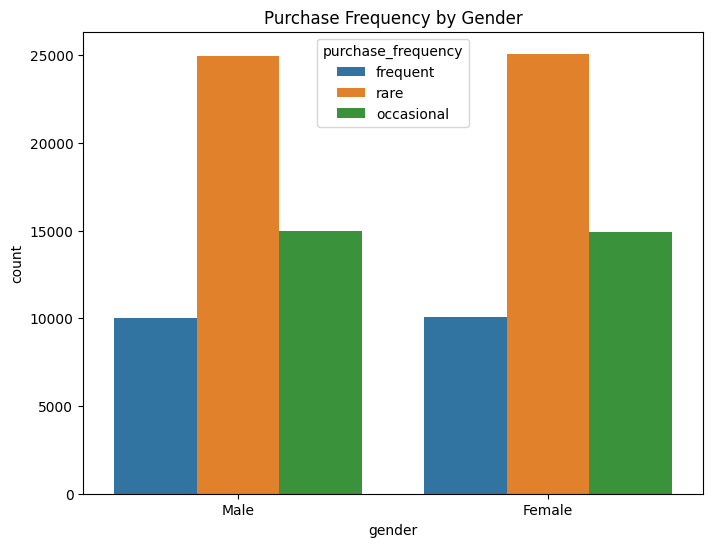

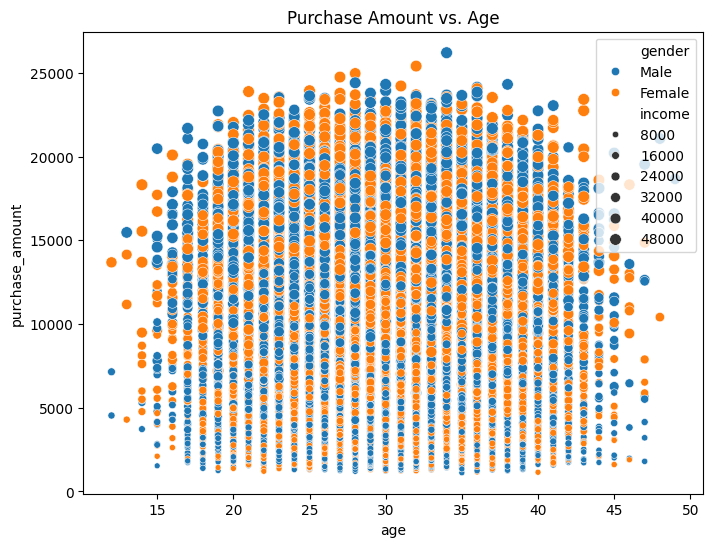

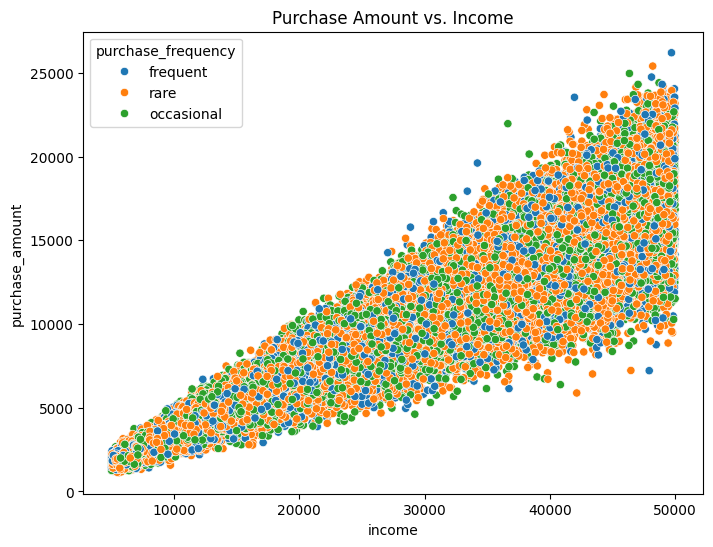

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Purchase frequency by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='purchase_frequency', data=df)
plt.title('Purchase Frequency by Gender')
plt.show()

# Purchase amount vs. age
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='purchase_amount', hue='gender', size='income', data=df)
plt.title('Purchase Amount vs. Age')
plt.show()

# Purchase amount vs. income
plt.figure(figsize=(8, 6))
sns.scatterplot(x='income', y='purchase_amount', hue='purchase_frequency', data=df)
plt.title('Purchase Amount vs. Income')
plt.show()

**Loyalty and Promotions:**
Compare purchase frequency by loyalty status and promotion usage.


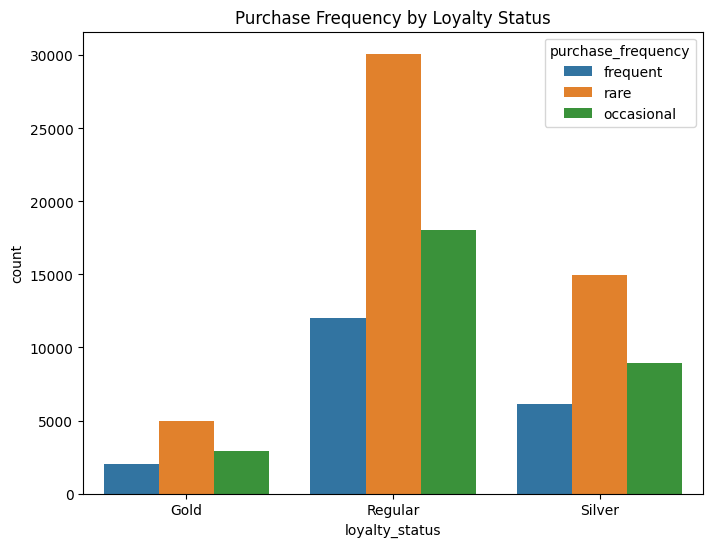

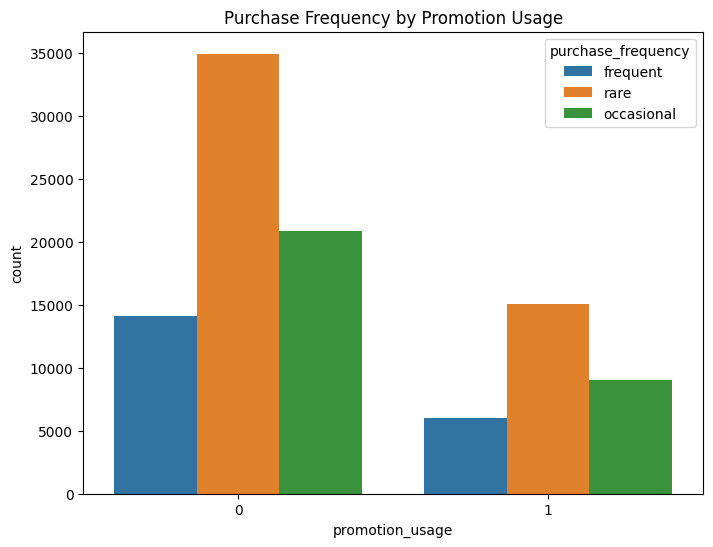

In [ ]:
# Purchase frequency by loyalty status
plt.figure(figsize=(8, 6))
sns.countplot(x='loyalty_status', hue='purchase_frequency', data=df)
plt.title('Purchase Frequency by Loyalty Status')
plt.show()

# Purchase frequency by promotion usage
plt.figure(figsize=(8, 6))
sns.countplot(x='promotion_usage', hue='purchase_frequency', data=df)
plt.title('Purchase Frequency by Promotion Usage')
plt.show()

**Product Category and Satisfaction:** Analyze purchase frequency by category and satisfaction score.



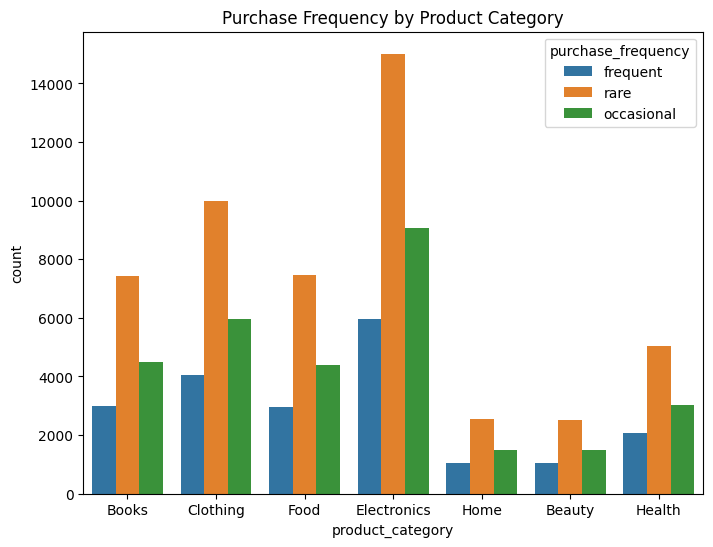

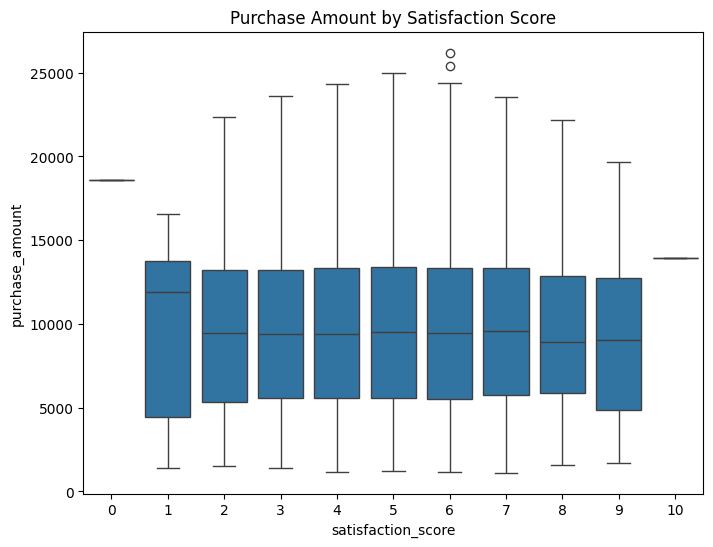

In [ ]:
# Purchase frequency by product category
plt.figure(figsize=(8, 6))
sns.countplot(x='product_category', hue='purchase_frequency', data=df)
plt.title('Purchase Frequency by Product Category')
plt.show()

# Purchase amount by satisfaction score
plt.figure(figsize=(8, 6))
sns.boxplot(x='satisfaction_score', y='purchase_amount', data=df)
plt.title('Purchase Amount by Satisfaction Score')
plt.show()

**Numerical Insights:** Check for correlations.



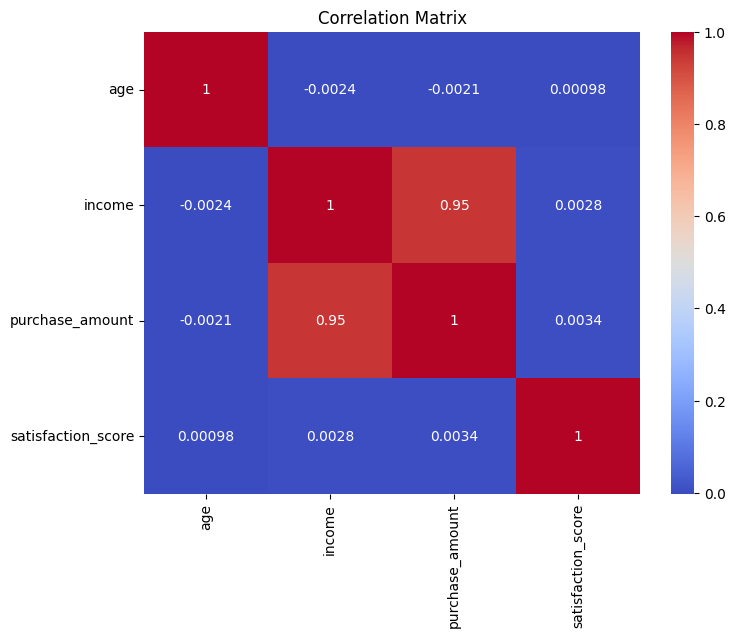

In [ ]:
# Correlation matrix
numerical_cols = ['age', 'income', 'purchase_amount', 'satisfaction_score']
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Exploratory Data Analysis Insights
1. **Demographics:**
- Purchase amounts rise steadily with age, peaking around mid-thirties(34) before tapering off slightly in older groups. This pattern holds for both genders, highlighting late-20s to late-30s (28 - 38) as the most lucrative customer segment.

2. **Loyalty and Promotions:**
- Gold status customers show balanced purchase frequencies, while Regular customers are mostly rare buyers, indicating low engagement. Silver customers have moderate engagement, with potential to increase frequent purchases through targeted incentives.
- Most purchases occur without promotions, with rare shoppers making up the largest segment regardless of promotion usage. Promotions show limited impact in increasing purchase frequency, indicating a need to reevaluate and better target promotional strategies.
3. **Product Category and Satisfaction:**
- Customers most frequently purchase Electronics and Clothing products, though these purchases are often rare rather than frequent, indicating sporadic but high-interest engagement. Opportunity to nurture these occasional buyers into more frequent customers.
- Purchase amounts show a wide range across satisfaction scores, but higher satisfaction does not consistently correlate with higher spending, suggesting other factors influence purchase value.
4. **Numerical Insights**: The analysis reveals a strong linear relationship between income and purchase amount (0.95), suggesting higher-income customers make bigger purchases, while demographic factors like age show no meaningful correlation with spending.


# Step 3: Predictive modeling
To measure customer engagement, we predict `purchase_frequency` (frequent vs. non-frequent, where non-frequent includes occasional and rare purchases). This target reflects how often customers interact with ABC's digital product, aligning with the goal of improving engagement. We use a **gradient boosting machine** model for its interpretability and ability to handle data with class imbalance.

## Data Preparation
We encode categorical variables and define the target variable for classification.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_recall_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from scipy.stats import randint as sp_randint, uniform as sp_uniform
from lightgbm import LGBMClassifier


df['is_frequent'] = df['purchase_frequency'].apply(lambda x: 1 if x == 'frequent' else 0)

le = LabelEncoder()
for col in ['gender', 'education', 'region', 'loyalty_status', 'product_category']:
    df[col] = le.fit_transform(df[col])

# Bin age based on EDA insights (28–38 as key group)
df['age_group'] = pd.cut(df['age'], bins=[0, 28, 38, float('inf')], labels=['young', 'mid_age', 'older'], include_lowest=True)

# Spending-to-income ratio (add small constant to avoid division by zero)
df['spending_to_income_ratio'] = df['purchase_amount'] / (df['income'] + 1e-6)

# Interaction between age_group and product_category
df['age_category_interaction'] = df['age_group'].astype(str) + '_' + df['product_category'].astype(str)

df['category_satisfaction'] = df['product_category'].astype(str) + '_' + df['satisfaction_score'].astype(str)

# Create loyalty_promo_interaction
df['loyalty_promo_interaction'] = df['loyalty_status'].astype(str) + '_' + df['promotion_usage'].astype(str)

# Create features specific to Class 1 (e.g., interaction terms)
df['high_value_frequent'] = (df['purchase_amount'] > df['purchase_amount'].median()) & (df['is_frequent'] == 1)
df['age_28-38_frequent'] = df['age'].between(28, 38) & (df['is_frequent'] == 1)

# Encode new categorical features
for col in ['category_satisfaction', 'age_group', 'age_category_interaction', 'loyalty_promo_interaction']:
    df[col] = le.fit_transform(df[col])

# Category-specific spending (average purchase_amount per product_category)
df['category_spending'] = df.groupby('product_category')['purchase_amount'].transform('mean')

X = df.drop(['id', 'purchase_frequency', 'is_frequent', 'gender', 'education'], axis=1)
y = df['is_frequent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Class distribution:\n{y_train.value_counts()}")

Training set: 70000 samples
Testing set: 30000 samples
Class distribution:
is_frequent
0    55933
1    14067
Name: count, dtype: int64


## Train the model
In this section, we train our model using LightGBM, a `Gradient Boosting Machine (GBM)` framework. Gradient Boosting is a powerful ensemble learning technique that builds sequential decision trees, where each tree corrects the errors of the previous ones, leading to strong predictive performance.

Class Ratio (Majority/Minority): 3.98
Balanced class weights: {0: np.float64(0.6257486635796399), 1: np.float64(2.488092699225137)}
Fitting 5 folds for each of 70 candidates, totalling 350 fits
[LightGBM] [Info] Number of positive: 14067, number of negative: 55933
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 928
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200957 -> initscore=-1.380323
[LightGBM] [Info] Start training from score -1.380323
Best Parameters: {'colsample_bytree': np.float64(0.7536223575686438), 'learning_rate': np.float64(0.023951590096829293), 'max_depth': 16, 'min_child_samples': 85, 'n_estimators': 181, 'reg_alpha': np.float64(0.3399812158451736), 'reg_lambda': np.flo

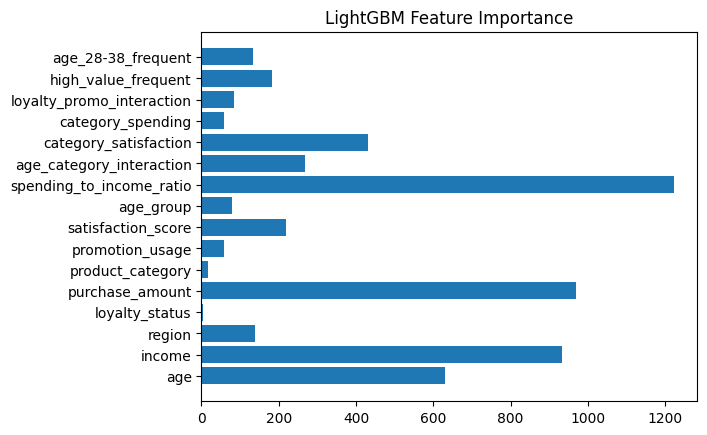

In [ ]:
# Calculate class imbalance ratio
class_ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(f"Class Ratio (Majority/Minority): {class_ratio:.2f}")

# Calculate balanced class weights
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print("Balanced class weights:", class_weight_dict)

# Hyperparameter Tuning for LightGBM
param_dist = {
    'n_estimators': sp_randint(100, 500),
    'max_depth': sp_randint(5, 20),  # Shallower trees prevent overfitting
    'learning_rate': sp_uniform(0.01, 0.2),
    'subsample': sp_uniform(0.7, 0.3),  # Stochastic boosting
    'colsample_bytree': sp_uniform(0.7, 0.3),
    'reg_alpha': sp_uniform(0.1, 1),  # L1 regularization
    'reg_lambda': sp_uniform(0, 0.5),  # L2 regularization
    'min_child_samples': sp_randint(20, 100),  # Control overfitting
    'scale_pos_weight': [1, 2, 3]  # Manual weight
}

# Use LightGBM with AUC-PR optimization
model = LGBMClassifier(
    random_state=42,
    objective='binary',
    metric='average_precision'  # Optimize for AUC-PR
)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=70,
    cv=5,
    scoring='f1',  # Balance precision/recall
    n_jobs=-1,
    verbose=2
)

# Train on original data
random_search.fit(X_train, y_train)

best_lgbm = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Evaluate
y_pred = best_lgbm.predict(X_test)
y_proba = best_lgbm.predict_proba(X_test)[:, 1]

print("\nEvaluation Metrics:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
auc_pr = auc(recall, precision)
print(f"AUC-PR: {auc_pr:.3f} (higher is better)")

# Feature Importance
import matplotlib.pyplot as plt
plt.barh(X_train.columns, best_lgbm.feature_importances_)
plt.title("LightGBM Feature Importance")
plt.show()

## Save the model and configurations

In [ ]:
import joblib
import json
import lightgbm as lgb
import importlib.metadata


joblib.dump(best_lgbm, 'best_lgbm_model.pkl')

best_params = random_search.best_params_
# convert numpy types to native Python types for JSON serialization
best_params_serializable = {k: float(v) if isinstance(v, np.floating) else int(v) if isinstance(v, np.integer) else v for k, v in best_params.items()}
with open('best_lgbm_params.json', 'w') as f:
    json.dump(best_params_serializable, f, indent=4)

# save additional configurations (class weights, random state, etc.)
config = {
    'class_ratio': float(class_ratio),
    'class_weights': {str(k): float(v) for k, v in class_weight_dict.items()},
    'random_state': 42,
    'lightgbm_version': importlib.metadata.version('lightgbm'),
    'sklearn_version': importlib.metadata.version('scikit-learn'),
    'numpy_version': importlib.metadata.version('numpy')
}
with open('model_config.json', 'w') as f:
    json.dump(config, f, indent=4)
